Preparing libraries

The Social Media Sentiments Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Data collection

In [ ]:
# Load the dataset
df = pd.read_csv("/sentimentdataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         732 non-null    int64         
 1   Text       732 non-null    object        
 2   Sentiment  732 non-null    object        
 3   Timestamp  732 non-null    datetime64[ns]
 4   User       732 non-null    object        
 5   Platform   732 non-null    object        
 6   Hashtags   732 non-null    object        
 7   Retweets   732 non-null    float64       
 8   Likes      732 non-null    float64       
 9   Country    732 non-null    object        
 10  Year       732 non-null    int32         
 11  Month      732 non-null    int32         
 12  Day        732 non-null    int32         
 13  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(6)
memory usage: 71.6+ KB


In [ ]:
# Data cleaning and initial exploration
df.drop(columns='Unnamed: 0.1', inplace=True)
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['Text'] = df['Text'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

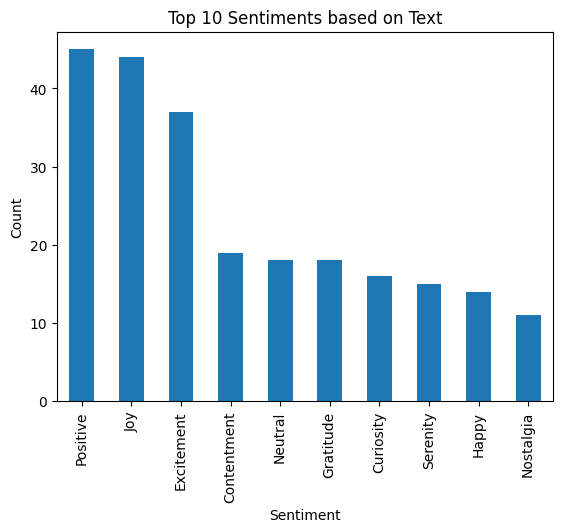

In [ ]:
# Visualizations
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


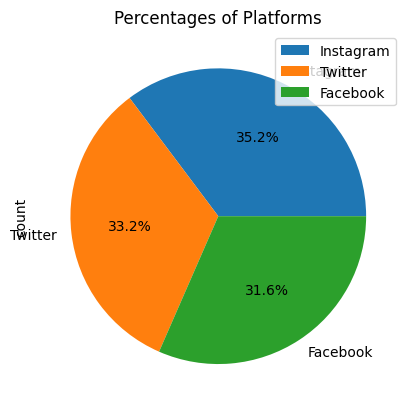

In [ ]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

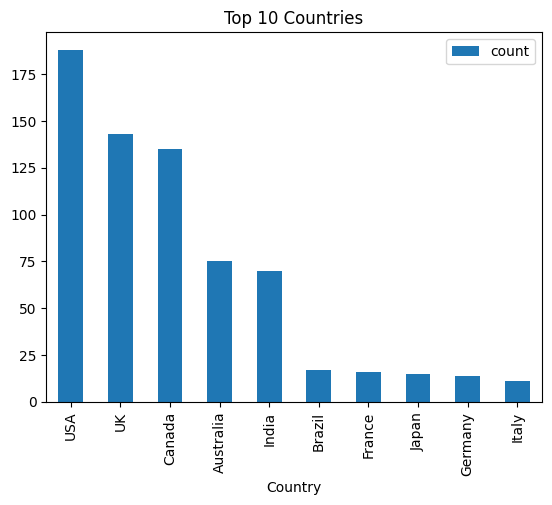

In [ ]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries')
plt.legend()
plt.show()

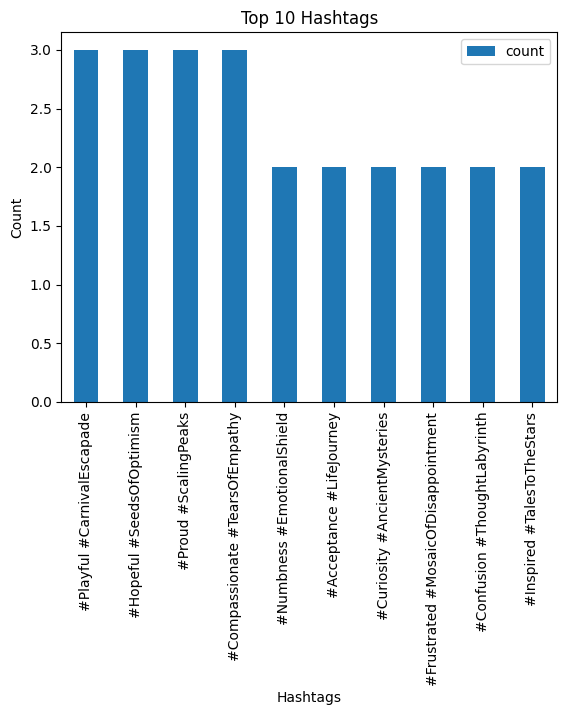

In [ ]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

Data cleaning and preparation

In [ ]:
# Describe numerical data
df.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [ ]:
# Analyzing numerical columns
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


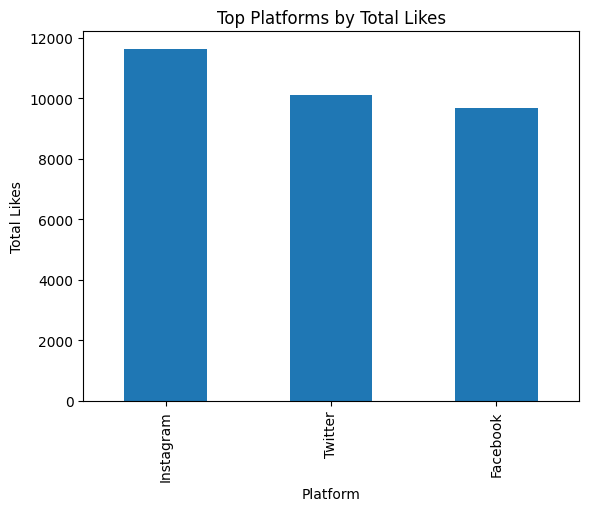

In [ ]:
# Example visualization outside of loop
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()


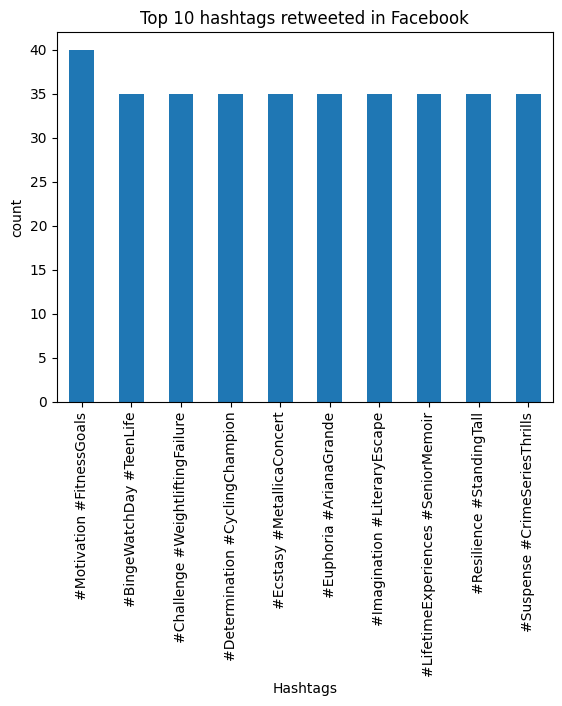

In [ ]:
# Example code to analyze hashtags retweeted on Facebook
Facebook = df[df['Platform'] == 'Facebook']
H_R_f = Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in Facebook')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

In [ ]:
# Split the data for training models
X = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  Models 🛠

In [ ]:

#  Logistic Regression

LRclassifier = LogisticRegression(solver='liblinear', max_iter=50)
LRclassifier.fit(X_train, y_train)
y_pred = LRclassifier.predict(X_test)
LRAcc = accuracy_score(y_pred, y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 7.48%


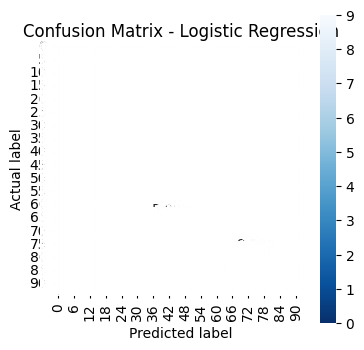

In [ ]:
# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Logistic Regression Classifier
train = LogisticRegression(max_iter=300, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Joy', 'Positive', 'Joy', 'Joy', 'Excitement', 'Joy', 'Positive',
       'Excitement', 'Excitement', 'Positive', 'Positive', 'Emotion',
       'Hopeful', 'Gratitude', 'Positive', 'Positive', 'Positive', 'Joy',
       'Hopeful', 'Neutral', 'Joy', 'Excitement', 'Positive', 'Joy',
       'Joy', 'Joy', 'Positive', 'Excitement', 'Excitement', 'Excitement',
       'Excitement', 'Neutral', 'Excitement', 'Excitement', 'Joy',
       'Excitement', 'Excitement', 'Gratitude', 'Joy', 'Positive', 'Joy',
       'Joy', 'Excitement', 'Joy', 'Neutral', 'Positive', 'Frustrated',
       'Joy', 'Gratitude', 'Excitement', 'Joy', 'Excitement', 'Positive',
       'Frustrated', 'Neutral', 'Joy', 'Joy', 'Positive', 'Neutral',
       'Positive', 'Excitement', 'Neutral', 'Positive', 'Neutral',
       'Happiness', 'Excitement', 'Excitement', 'Hopeful', 'Positive',
       'Excitement', 'Positive', 'Positive', 'Excitement', 'Gratitude',
       'Joy', 'Neutral', 'Wonder', 'Gratitude', 'Positive', 'Gratitude',


In [ ]:
# Save the Logistic Regression model
import joblib
model_filename = 'model_of_data.joblib'
joblib.dump(LRclassifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as model_of_data.joblib


In [ ]:
# Load and test the saved model
model_data = joblib.load(model_filename)
test = model_data.predict(X_test)
print(test)

['Joy' 'Positive' 'Joy' 'Joy' 'Excitement' 'Excitement' 'Positive'
 'Excitement' 'Excitement' 'Excitement' 'Joy' 'Motivation' 'Helplessness'
 'Joy' 'Positive' 'Positive' 'Positive' 'Joy' 'Joy' 'Neutral' 'Joy' 'Joy'
 'Positive' 'Positive' 'Positive' 'Joy' 'Positive' 'Excitement' 'Positive'
 'Excitement' 'Joy' 'Joy' 'Gratitude' 'Excitement' 'Excitement'
 'Excitement' 'Excitement' 'Joy' 'Gratitude' 'Positive' 'Joy' 'Gratitude'
 'Excitement' 'Joy' 'Joy' 'Joy' 'Disgust' 'Joy' 'Joy' 'Joy' 'Joy' 'Joy'
 'Positive' 'Confidence' 'Empathetic' 'Joy' 'Positive' 'Positive'
 'Neutral' 'Joy' 'Joy' 'Joy' 'Positive' 'Joy' 'CulinaryOdyssey'
 'Excitement' 'Excitement' 'Hopeful' 'Positive' 'Excitement' 'Positive'
 'Positive' 'Positive' 'Grief' 'Joy' 'Joy' 'Wonder' 'Grief' 'Positive'
 'Joy' 'Joy' 'Positive' 'Excitement' 'Gratitude' 'Excitement' 'Positive'
 'Joy' 'Neutral' 'Joy' 'Winter Magic' 'Positive' 'Joy' 'Excitement' 'Joy'
 'Excitement' 'Positive' 'Joy' 'Emotion' 'Gratitude' 'Despair'
 'Excitement' 'Ne

In [ ]:
# K Neighbors Classifier
KNclassifier = KNeighborsClassifier(n_neighbors=200)
KNclassifier.fit(X_train, y_train)
y_pred = KNclassifier.predict(X_test)
KNAcc = accuracy_score(y_pred, y_test)
print('K Neighbors accuracy is: {:.2f}%'.format(KNAcc*100))

K Neighbors accuracy is: 6.80%


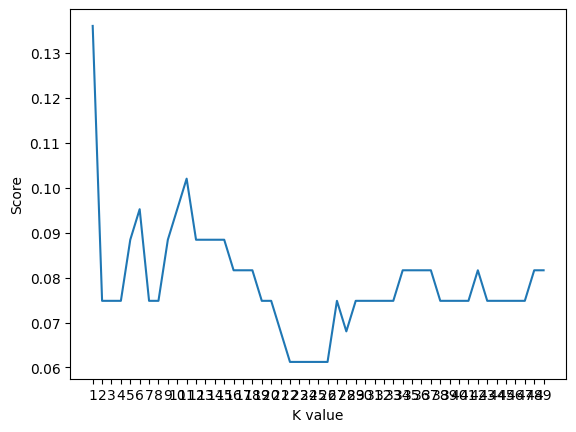

KNN Acc Max 13.61%


In [ ]:
# Plot accuracy over different K values
scoreListknn = []
for i in range(1, 50):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
plt.plot(range(1, 50), scoreListknn)
plt.xticks(np.arange(1, 50, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

In [ ]:
# Support Vector Machine (SVM)
SVCclassifier = SVC(kernel='linear', max_iter=50)
SVCclassifier.fit(X_train, y_train)
y_pred = SVCclassifier.predict(X_test)
SVCAcc = accuracy_score(y_pred, y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

SVC accuracy is: 10.88%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
# Decision Tree
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=5)
DTclassifier.fit(X_train, y_train)
y_pred = DTclassifier.predict(X_test)
DTAcc = accuracy_score(y_pred, y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

Decision Tree accuracy is: 10.20%


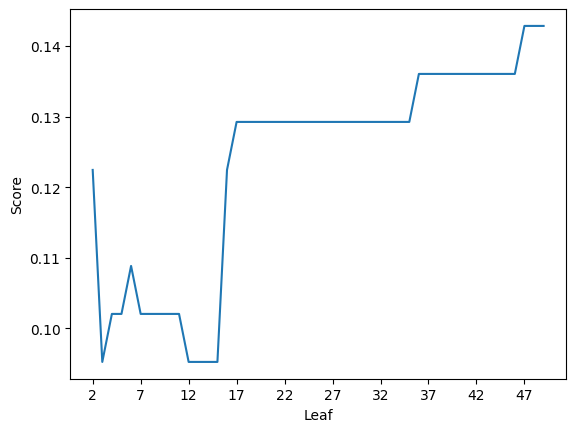

DT Acc Max 14.29%


In [ ]:
# Plot accuracy over different leaf nodes in Decision Tree
scoreListDT = []
for i in range(2, 50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
plt.plot(range(2, 50), scoreListDT)
plt.xticks(np.arange(2, 50, 5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [ ]:
# Random Forest
RFclassifier = RandomForestClassifier(max_leaf_nodes=5)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
RFAcc = accuracy_score(y_pred, y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 10.20%


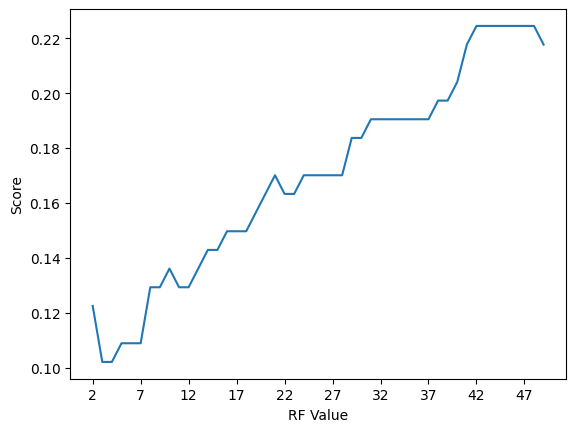

RF Acc Max 22.45%


In [ ]:
# Plot accuracy over different leaf nodes in Random Forest
scoreListRF = []
for i in range(2, 50):
    RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
plt.plot(range(2, 50), scoreListRF)
plt.xticks(np.arange(2, 50, 5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [ ]:
# Model Comparison
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'],
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare = compare.sort_values(by='Accuracy', ascending=False)
print(compare)

                 Model   Accuracy
7    Random Forest Max  22.448980
5    Decision Tree Max  14.285714
2      K Neighbors Max  13.605442
3                  SVM  10.884354
4        Decision Tree  10.204082
6        Random Forest  10.204082
0  Logistic Regression   7.482993
1          K Neighbors   6.802721
